In [0]:
# Fill in your name using the format below and student ID number
your_name = "Serban, Dragos-Mihai"
student_id = "1033859"

In [0]:
# Before submission, set this to True so that you can render and verify this notebook without training deep learning models.
# Any deep learning models will be trained from file instead.
stop_training = True

In [0]:
# Uncomment the following line to run in Google Colab
!pip install --quiet openml 

     |████████████████████████████████| 163kB 4.9MB/s 


In [0]:
# Uncomment the following line to run in Google Colab
#%tensorflow_version 2.x
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU') # Check whether GPUs are available

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [0]:
%matplotlib inline
import openml as oml
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [0]:
from packaging import version
import sklearn
import tensorflow
sklearn_version = sklearn.__version__
tensorflow_version = tensorflow.__version__
if version.parse(sklearn_version) < version.parse("0.22.0"):
    print("scikit-learn is outdated. Please update now!")
if version.parse(tensorflow_version) < version.parse("2.1.0"):
    print("Tensorflow is outdated. This is version {}. Please update to 2.1.".format(tensorflow_version))
else:
    print("Hi{}, Looks good. You may continue :)".format(your_name.split(",")[1]))

Hi Dragos-Mihai, Looks good. You may continue :)


# Assignment 3

### Choice of libraries
We recommend to use Tensorflow in this assignment since that is what we covered in the labs. If you feel confident using PyTorch (and Skorch for the scikit-learn wrapper), that is allowed too, as long as you are able to implement the requested functions and return the requested data. Read the assignment carefully and ensure that you can. Note that you may also need to do a bit more work to implement certain helper functions and wrappers.

### Storing and submitting files
You must be able to store your models and submit them to GitHub Classroom. The evaluation functions used in this notebook will automatically store models for you.

If you want to run and solve the notebook on your local machine/laptop, fill in the path 'base_dir' to your assignment folder into the next cell.

If you use Colab, we recommend that you link it to your Google Drive:  
* Upload the assignment folder to your Google Drive (+ New > Folder Upload)
* Open Colab in a browser, open the 'Files' menu in the left sidebar, and click 'Mount Drive'
  * At this point you may need to authenticate
* Fill in the path to your assignment folder below
  * It's likely '/content/drive/My Drive/assignment-3-yourname'

In [0]:
base_dir = '/content/drive/My Drive/assignment-3-drgs' # For Google Colab
# base_dir = './'

In [0]:
#Uncomment to link Colab notebook to Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


### Using GPUs
While you can solve this assignment on a CPU, using a GPU will speed things up training quite a bit. If you have a local GPU, you can use that. If you don't, we recommend Google Colab. When you are in Colab:
* In Runtime > Change runtime type, select the GPU under Hardware Accelerator
* Run the 3rd cell on the top of this notebook to check that the GPU is found.

Note that Colab may not always have GPUs ready all the time, and may deny you a GPU when you have used them a lot. When you are temporarily 'locked out', you can switch to a non-GPU runtime or to a local instance of Jupyter running on your machine.

### Constraints
* Your stored models should not be larger than 100MB when stored in file. GitHub will not allow uploading if they are.
* When questions ask you to provide an explanation, it should be less than 500
characters long. Some questions have a higher limit. Always answer in full sentences.
* Don't train for more than 100 epochs, i.e. don't throw excessing computational resources at the problem. If your model hasn't converged by then, think of ways it could be made to converge faster. In this assignment you are not after the last tiny improvement, you can stop when learning curves flatten out. Do at least 5 epochs to get a reasonable learning curve.

### Grading
Grading is based on the following aspects:
* Correctness in answering the question. Carefully read the question and answer
what is asked for. Train your models on the correct data. It should be clear on which data should be trained, but ask when in doubt. When something is not defined (e.g. the number of epochs or batch size), you can freely choose them.
* Clarity of your explanations. Write short but precise descriptions of what you did and why. Give short but clear explanations of the observed performance. 
After your explanation, your approach and model should make perfect sense. Refrain from using symbols as substitute for words in your explanation (e.g. no: "More layers -> more parameters" yes: "More layers mean more parameters"). 
* Part of your grade depends on how well your model performs. When the question says 'you should at least get x%', x% will give you a good but not the maximal grade. You can get the full grade when you are close to what is the expected maximal performance. You don't need to invest lots of effort into the last tiny improvement, though. Unless specified, we look at the accuracy on the validation set. If your learning curves are very erratic we'll compute a score based on the smoothed curves (i.e. single peaks don't count).
* The weight of each question is indicated. Take this into account when planning your time.

### Other tips
* Don't wait until the last minute to do the assignment. The models take time to train, most questions will require some thinking, and some require you to read up on some new concepts.
* Take care that you upload the results as requested. You need to submit not only the notebooks but also the trained models and learning curves (training histories). Be sure to run the verification script and check that all the results are included.
* We provide an evaluation function that also stored models to disk. After you are done training the model, set the 'train' attribute to False so that the model doesn't train again (and loads from file instead) when you restart and rerun your notebook.
* Explore. For many questions we'll ask you to explain your model design decisions. You cannot magically know the best solutions but you can experiment
based on your understanding and make decisions based on both your knowledge and experiments. Your explanation is at least as important as the performance of your model.
* Be original. We will check for plagiarism between student submissions.

### Data
The [Street View House Numbers Dataset](https://www.openml.org/d/41081) contains 32-by-32 RGB images centered around a single digit of a house number appearing in Google Street View. Many of the images do contain some distractors at the sides. It consists of 10 classes, 1 for each digit. Digit '1' has label 1, '9' has label 9 and '0' has label 10. Your goal is to build models that recognize the correct digit.

If you use Colab, uncomment the following to cache the dataset inside the VM. This will make reloading faster if you need to restart your notebook. After longer periods of inactivity, your VM may be recycled and the cache lost, in which case the dataset will be downloaded again. Also note that this dataset is about 1Gb large, and will take even more space in memory. You may need to switch to a high-RAM environment (Colab will ask you if you hit the limit).

In [0]:
# Use OpenML caching in Colab
# On your local machine, it will store data in a hidden folder '~/.openml'
import os
oml.config.cache_directory = os.path.expanduser('/content/cache')

In [0]:
# Download Streetview data. Takes a while (several minutes), and quite a bit of
# memory when it needs to download. After caching it loads faster.
SVHN = oml.datasets.get_dataset(41081)
X, y, _, _ = SVHN.get_data(dataset_format='array',
    target=SVHN.default_target_attribute)

Reshape, sample and split the data

In [0]:
from tensorflow.keras.utils import to_categorical

Xr = X.reshape((len(X),32,32,3))
Xr = Xr / 255.
yr = to_categorical(y)

In [0]:
# DO NOT EDIT. DO NOT OVERWRITE THESE VARIABLES.
from sklearn.model_selection import train_test_split
# We do an 80-20 split for the training and test set, and then again a 80-20 split into training and validation data
X_train_all, X_test, y_train_all, y_test = train_test_split(Xr,yr, stratify=yr, train_size=0.8, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_all,y_train_all, stratify=y_train_all, train_size=0.8, random_state=1)
evaluation_split = X_train, X_val, y_train, y_val

Check the formatting - and what the data looks like

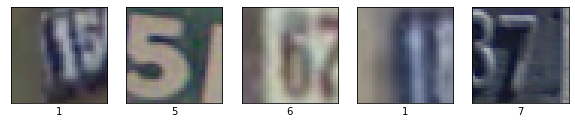

In [0]:
from random import randint

# Takes a list of row ids, and plots the corresponding images
# Use grayscale=True for plotting grayscale images
def plot_images(X, y, grayscale=False):
    fig, axes = plt.subplots(1, len(X),  figsize=(10, 5))
    for n in range(len(X)):
        if grayscale:
            axes[n].imshow(X[n], cmap='gray')
        else:
            axes[n].imshow(X[n])

        axes[n].set_xlabel((np.argmax(y[n])+1)%10) # Label is index+1
        axes[n].set_xticks(()), axes[n].set_yticks(())
    plt.show();

images = [randint(0,len(X_train)) for i in range(5)]
X_random = [X_train[i] for i in images]
y_random = [y_train[i] for i in images]
plot_images(X_random, y_random)

### Evaluation harness
We provide an evaluation function 'run_evaluation' that you should use to 
evaluate all your models. It also stores the trained models to disk so that
your submission can be quickly verified, as well as to avoid having to train
them over and over again. Your last run of the evaluation function (the last one
stored to file), is the one that will be evaluated. The 'train' argument indicates whether to train or to load from disk. We have provided helper functions for saving and loading models to/from file, assuming you use TensorFlow. If you use PyTorch you'll have to adapt them.

In [0]:
import os
import pickle
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model # for use with tensorflow

def shout(text, verbose=1):
    """ Prints text in red. Just for fun.
    """
    if verbose>0:
        print('\033[91m'+text+'\x1b[0m')

def load_model_from_file(base_dir, name, extension='.h5'):
    """ Loads a model from a file. The returned model must have a 'fit' and 'summary'
    function following the Keras API. Don't change if you use TensorFlow. Otherwise,
    adapt as needed. 
    Keyword arguments:
    base_dir -- Directory where the models are stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
    """
    try:
        model = load_model(os.path.join(base_dir, name+extension))
    except OSError:
        shout("Saved model could not be found. Was it trained and stored correctly? Is the base_dir correct?")
        return False
    return model

def save_model_to_file(model, base_dir, name, extension='.h5'):
    """ Saves a model to file. Don't change if you use TensorFlow. Otherwise,
    adapt as needed. 
    Keyword arguments:
    model -- the model to be saved
    base_dir -- Directory where the models should be stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
    """
    model.save(os.path.join(base_dir, name+extension))

# Helper function to extract min/max from the learning curves
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])

# DO NOT EDIT
def run_evaluation(name, model_builder, data, base_dir, train=True, 
                   generator=False, epochs=3, batch_size=32, steps_per_epoch=60, 
                   verbose=1, **kwargs):
    """ Trains and evaluates the given model on the predefined train and test splits,
    stores the trained model and learning curves. Also prints out a summary of the 
    model and plots the learning curves.
    Keyword arguments:
    name -- the name of the model to be stored, e.g. 'question_1_1.h5'
    model_builder -- function that returns an (untrained) model. The model must 
                     have a 'fit' function that follows the Keras API. It can wrap
                     a non-Keras model as long as the 'fit' function takes the 
                     same attributes and returns the learning curves (history).
                     It also must have a 'summary' function that prints out a 
                     model summary, and a 'save' function that saves the model 
                     to disk. 
    data -- data split for evaluation. A tuple of either:
            * Numpy arrays (X_train, X_val, y_train, y_val)
            * A data generator and validation data (generator, X_val, y_val)
    base_dir -- the directory to save or read models to/from
    train -- whether or not the data should be trained. If False, the trained model
             will be loaded from disk.
    generator -- whether the data in given as a generator or not
    epochs -- the number of epochs to train for
    batch_size -- the batch size to train with
    steps_per_epoch -- steps per epoch, in case a generator is used (ignored otherwise)
    verbose -- verbosity level, 0: silent, 1: minimal,...
    kwargs -- keyword arguments that should be passed to model_builder.
              Not required, but may help you to adjust its behavior
    """
    model = model_builder(**kwargs)
    if not model:
        shout("No model is returned by the model_builder")
        return
    if not hasattr(model, 'fit'):
        shout("Model is not built correctly")
        return
    learning_curves = {}
    if train and not stop_training: # Train anew
        shout("Training the model", verbose)
        if generator:
            generator, X_val, y_val = data
            history = model.fit(generator, epochs=epochs, batch_size=batch_size,
                              steps_per_epoch=steps_per_epoch, verbose=1, 
                              validation_data=(X_val, y_val))
            learning_curves = history.history
        else:
            X_train, X_val, y_train, y_val = data
            history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                              verbose=1, validation_data=(X_val, y_val))
            learning_curves = history.history
        shout("Saving to file", verbose)
        save_model_to_file(model, base_dir, name)
        with open(os.path.join(base_dir, name+'.p'), 'wb') as file_pi:
            pickle.dump(learning_curves, file_pi)
        shout("Model stored in "+base_dir, verbose)
    else: # Load from file
        shout("Loading model from file", verbose)
        model = load_model_from_file(base_dir, name)
        if not model:
            shout("Model not found")
            return
        learning_curves = None
        try:
            learning_curves = pickle.load(open(os.path.join(base_dir, name+'.p'), "rb"))
        except FileNotFoundError:
            shout("Learning curves not found")
            return
        shout("Success!", verbose)
    # Report
    print(model.summary())
    lc = pd.DataFrame(learning_curves)
    lc.plot(lw=2,style=['b:','r:','b-','r-']);
    plt.xlabel('epochs');
    print(lc.apply(minMax))

In [0]:
# Toy usage example
# Remove before submission
from tensorflow.keras import models
from tensorflow.keras import layers 

def build_toy_model():
    model = models.Sequential()
    model.add(layers.Reshape((3072,), input_shape=(32,32,3)))
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# First build and store
run_evaluation("toy_example", build_toy_model, evaluation_split, base_dir, 
               train=False, epochs=3, batch_size=32)

Loading model from file


In [0]:
# Toy usage example
# Remove before submission
# With train=False: load from file and report the same results without rerunning
run_evaluation("toy_example", build_toy_model, evaluation_split, base_dir, 
               train=False)

Loading model from file


## Part 1. Dense networks (10 points)

### Question 1.1: Baseline model (4 points)
- Build a dense network (with only dense layers) of at least 3 layers that is shaped like a pyramid: The first layer must have many nodes, and every subsequent layer must have increasingly fewer nodes, e.g. half as many. Implement a function 'build_model_1_1' that returns this model.
- You can explore different settings, but don't use any preprocessing or regularization yet. You should be able to achieve at least 70% accuracy, but more is of course better. Unless otherwise stated, you can use accuracy as the evaluation metric in all questions.
* Add a small description of your design choices (max. 500 characters) in 'answer_q_1_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- The name of the model should be 'model_1_1'. Evaluate it using the 'run_evaluation' function. For this question, you should not use more than 50 epochs.

In [0]:
def build_model_1_1():
    model = models.Sequential()
    model.add(layers.Reshape((3072,), input_shape=(32,32,3)))
    model.add(layers.Dense(100, activation='relu'))
    model.add(layers.Dense(50, activation='relu'))
    model.add(layers.Dense(25, activation='relu'))
    model.add(layers.Dense(12, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    
    model.compile(optimizer='sgd',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

run_evaluation("model_1_1", build_model_1_1, evaluation_split, base_dir, 
               train=False, epochs=20, batch_size=32)

answer_q_1_1 = """Only 100 nodes were used on the first layer, so that the no. of parameters will be smaller. This helps with preventing overfitting and reducing training time. Next layers contained half the nodes of the previous layer. More nodes on each layer did not result in any improvement. 
Max validation accuracy is 75% and the model does not overfit. Batch size 32 performed slightly better than size 64. 20 epochs were enough to achieve some convergence. SGD made the model training faster."""

print("Answer is {} characters long".format(len(answer_q_1_1)))

Loading model from file
Answer is 478 characters long


### Question 1.2: Preprocessing (2 points)
Rerun the model, but now preprocess the data first by converting the images to 
greyscale. You can use the helper function below. If you want to do additional 
preprocessing, you can do that here, too.
* Store the preprocessed data as a tuple `preprocessed_split`
* Rerun and re-evaluate your model using the preprocessed data.
  * For the remainder of the assignment, always use the preprocessed data
* Explain what you did and interpret the results in 'answer_q_1_2'. Is the model
  better, if so, why?

In [0]:
# Luminance-preserving RGB to greyscale conversion
def rgb2gray(X):
    return np.expand_dims(np.dot(X, [0.2990, 0.5870, 0.1140]), axis=3)

In [0]:
# Replace with the preprocessed data
X_train_g = rgb2gray(X_train).astype(np.float32)
X_val_g = rgb2gray(X_val).astype(np.float32)

preprocessed_split = X_train_g, X_val_g, y_train, y_val

# Adjusted model
def build_model_1_2():
    model = models.Sequential()
    model.add(layers.Reshape((1024,), input_shape=(32,32,1)))
    model.add(layers.Dense(100, activation='relu'))
    model.add(layers.Dense(50, activation='relu'))
    model.add(layers.Dense(25, activation='relu'))
    model.add(layers.Dense(12, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    
    model.compile(optimizer='sgd',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Evaluate. Use a new name 'model_1_2' to not overwrite the previous trained model
run_evaluation("model_1_2", build_model_1_2, preprocessed_split, base_dir, 
               train=False, epochs=20, batch_size=32)
answer_q_1_2 = """Train and validation sets were transformed to grayscale using rgb2gray() method. Grayscale conversion did not result in any improvement. Max validation accuracy dropped by 1%, to 74%.
Since accuracy and learning curves are almost the same, then the color is not an important decision factor. Hence, the preprocessed version is preferred in further iterations, since the number of input features is smaller"""

print("Answer is {} characters long".format(len(answer_q_1_2)))

Loading model from file
Answer is 405 characters long


### Question 1.3: Regularization and tuning (4 points)
* Regularize the model. You can explore (and combine) different techniques. What works best?
* Tune other hyperparameters (e.g. learning rate, batch size,...) as you see fit.
* Explain your findings and final design decisions. Retrain the model again on the preprocessed data and discuss the results.
* Return your model in function 'build_model_1_3' and write your answer in 'answer_q_1_3'

In [0]:
def build_model_1_3():
    model = models.Sequential()
    model.add(layers.Reshape((1024,), input_shape=(32,32,1)))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(100, activation='relu', kernel_initializer='he_normal'))
    model.add(layers.Dense(50, activation='relu', kernel_initializer='he_normal'))
    model.add(layers.Dense(25, activation='relu', kernel_initializer='he_normal'))
    model.add(layers.Dense(12, activation='relu', kernel_initializer='he_normal'))
    model.add(layers.Dense(10, activation='softmax', kernel_initializer='he_normal'))
    
    from tensorflow.keras.optimizers import Adam
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model
    
run_evaluation("model_1_3", build_model_1_3, preprocessed_split, base_dir, 
               train=False, epochs=30, batch_size=32)

answer_q_1_3 = """Changing the optimizer to Adam and using Batch Normalization increased the accuracy up to 85%. Best results were with learning rate 0.001. The use of He normal initializer made the model converge faster.
The number of epochs increased to 30, since the model could not converge as fast as before. To prevent overfitting, L1 and L2 regularization has been used. There has been no significant change in the learning curves, while accuracy dropped, so they were not used in the end."""
print("Answer is {} characters long".format(len(answer_q_1_3)))

Loading model from file
Answer is 446 characters long


## Part 2. Convolutional neural networks (10 points)
### Question 2.1: Design a ConvNet (7 points)
- Build a sequential convolutional neural network. Try to achieve the best validation accuracy you can. You should be able to get at least 90% accuracy. You can use any depth, any combination of layers, and any kind of regularization and tuning. 
- Add a description of your design choices in 'answer_q_2_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- You are allowed **800** characters for this answer (but don’t ramble).
- The name of the model should be 'model_2_1'. Evaluate it using the 'run_evaluation' function and the preprocessed data.

In [0]:
def build_model_2_1():
  from tensorflow.keras import regularizers
  model = models.Sequential()
  model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.001), input_shape=(32, 32, 1)))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D((2, 2), strides=2))
  model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.001)))
  model.add(layers.MaxPooling2D((2, 2), strides=2))
  model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.001)))
  model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.001)))
  model.add(layers.Flatten())
  model.add(layers.Dropout(rate=0.3))
  model.add(layers.Dense(256, activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.001)))
  model.add(layers.Dense(10, activation='softmax', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.001)))

  from tensorflow.keras.optimizers import Adam
  model.compile(optimizer=Adam(learning_rate=0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model

run_evaluation("model_2_1", build_model_2_1, preprocessed_split, base_dir, 
               train=False, epochs=50, batch_size=32)

answer_q_2_1 = """First convolutional layer has only 32 filters, so that the focus is on more general features (e.g. edges). Afterwards, batch normalization was used to reduce training time.
Max pooling with stride=2 is used to reduce the resolution. Using strides decreased accuracy, but the validation loss curve became more stable. To compensate for max pooling, the next conv layer has 64 filters.
Then, max pooling with stride=2 is applied again, followed by a conv layer with 128 filters to compensate. The next conv layer was added to focus more on abstract details.
L2 regularization and dropout were used to eliminate overfitting. 256 neurons on the last Dense led to the same result as with 512. Kernel size 3x3 provided better results than 4x4 and 5x5. Max accuracy is 0.92 and the model is not overfitting"""

print("Answer is {} characters long".format(len(answer_q_2_1)))

Loading model from file
Answer is 799 characters long


### Question 2.2: Data Augmentation (3 points)

- Augment the preprocessed training data. You can explore using image shifts, rotations, zooming, flips, etc. What works well, and what does not?
- Evaluate the model from question 2.1 with the augmented data using the 'run_evaluation' function. Store the new trained model as 'model_2_2'.
- Add a description of your design choices in 'answer_q_2_2': explain what you did and also why. Also discuss the performance of the model.

In [0]:
# Note that we build the same untrained model as in question 2.1 but store the 
# trained version as model_2_2. Change attributes as needed to run on augmented
# data

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    rotation_range=30
    )

augmented_train = datagen.flow(preprocessed_split[0], preprocessed_split[2], batch_size=32)

augmented_split = augmented_train, X_val_g, y_val

run_evaluation("model_2_2", build_model_2_1, augmented_split, base_dir, 
               train=False, epochs=50, batch_size=32, generator=True)

answer_q_2_2 = """Considering that most of the digits in the images are not perfectly centered or rotated, I thought that a slight shift of 10% over width and height would be good (10% worked better than 20% or 30%).
A rotation range of max 30 degrees provided the best results. Max accuracy decreased to 0.87. Validation loss was almost always smaller than training loss, so this might signal that this data augmentation is just over-regularization.
Hence, data augmentation might be unnecessary for this model."""

print("Answer is {} characters long".format(len(answer_q_2_2)))

Loading model from file
Answer is 491 characters long


## Part 3. Model interpretation (10 points)
### Question 3.1: Interpreting misclassifications (2 points)
Study which errors are still made by your last model (model_2_2) by evaluating it on the test data. You do not need to retrain the model.
* What is the accuracy of model_2_2 on the test data? Store this in 'test_accuracy_3_1'.
* Plot the confusion matrix in 'plot_confusion_matrix' and discuss which classes are often confused.
* Visualize the misclassifications in more depth by focusing on a single
class (e.g. the number '2') and analyse which kinds of mistakes are made for that class. For instance, are the errors related to the background, noisiness, etc.? Implement the visualization in 'plot_misclassifications'.
* Summarize your findings in 'answer_q_3_1'

621/621 [==============================] - 3s 5ms/step - loss: 0.7661 - accuracy: 0.8758
Accuracy on the test data:  [0.7660555243492126, 0.8757679462432861]
Answer is 437 characters long


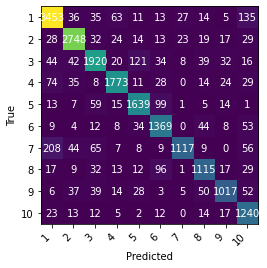

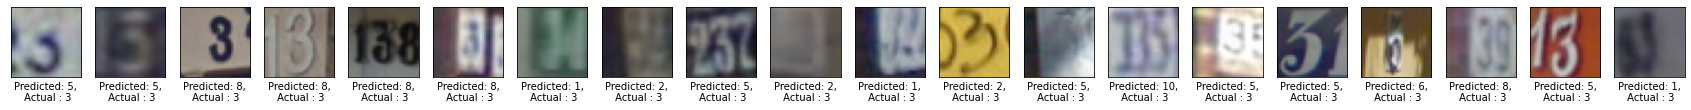

In [0]:
# Load the model from file
trained_model = load_model_from_file(base_dir, "model_2_2")

# Convert test dataset to grayscale
X_test_g = rgb2gray(X_test)

# Evaluate the already trained model on the test dataset 
trained_model_test_accuracy = trained_model.evaluate(X_test_g, y_test)

print("Accuracy on the test data: ", trained_model_test_accuracy)

# The number below has been obtained after running the lines above
test_accuracy_3_1 = 0.8758

# List containing the numbers from 1 to 10
svhn_classes = [x for x in range(1, 11)]

# Get the model-predicted classes
y_pred = trained_model.predict(X_test_g)

# Get the misclassified samples
misclassified_samples = np.nonzero(np.argmax(y_test, axis=1) != np.argmax(y_pred, axis=1))[0]

def plot_confusion_matrix():
  # Parts of this code originate from the solutions of Lab 6

  from sklearn.metrics import confusion_matrix

  # Get the confusion matrix
  cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
  
  # Plot the confusion matrix
  fig, ax = plt.subplots()
  im = ax.imshow(cm)
  ax.set_xticks(np.arange(10)), ax.set_yticks(np.arange(10))
  ax.set_xticklabels(svhn_classes, rotation=45, ha="right")
  ax.set_yticklabels(svhn_classes)
  ax.set_ylabel('True')
  ax.set_xlabel('Predicted')

  for i in range(100):
    ax.text(int(i/10),i%10,cm[i%10,int(i/10)], ha="center", va="center", color="w")


def plot_misclassifications():
  fig, axes = plt.subplots(1, 20,  figsize=(30, 30))
  
  count_plotted = 0
  for _, i in enumerate(misclassified_samples):
    if count_plotted == 20:
      break
    if svhn_classes[np.argmax(y_test[i])] is 3:
      axes[count_plotted].imshow(X_test[i])
      axes[count_plotted].set_xlabel("Predicted: %s,\n Actual : %s" % (svhn_classes[np.argmax(y_pred[i])], svhn_classes[np.argmax(y_test[i])]))
      axes[count_plotted].set_xticks(()), axes[count_plotted].set_yticks(())
      count_plotted += 1

plot_confusion_matrix()
plot_misclassifications()

answer_q_3_1 = """The most confused classes are 1 with 0, 3 with 5, 7 with 1.
Focusing on class 3 it is noticeable that most of the misclassifications of 3 with 5 occur when the image is too blurry or when the digit 3 is not clear.
3 is confused with 8 sometimes when the font is more <<curved>>, making the distinction between a blurred/incomplete 8 and a 3 harder to recognize.
When the images are extremely blurred, other classes are predicted as well."""
print("Answer is {} characters long".format(len(answer_q_3_1)))

### Question 3.2: Visualizing activations (4 points)
* Implement a function `plot_activations()` that returns the most interesting activations (feature maps). Select the first example from the test set. Retrieve and visualize the activations of model 2_2 for that example (make sure you load that model in the function), for every filter for different convolutional layers (at different depths in the network).
* Give an explanation (as detailed as you can) about your observations in 'answer_q_3_2'. Is your model indeed learning something useful?

Showing all activations


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


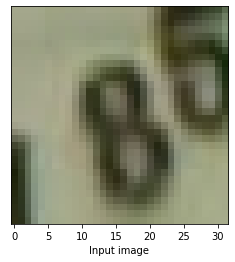

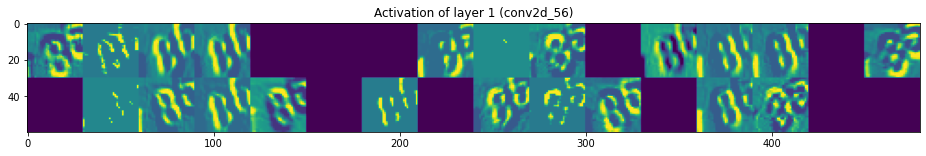

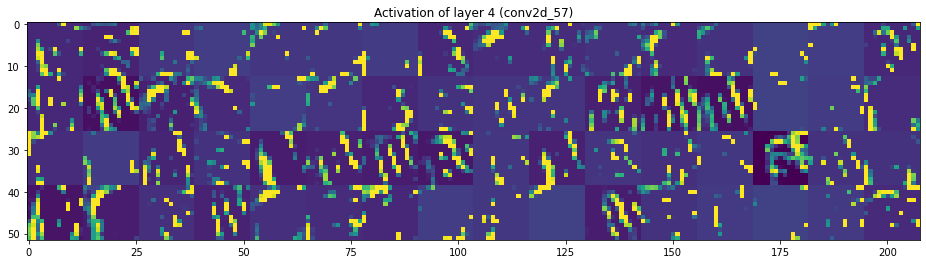

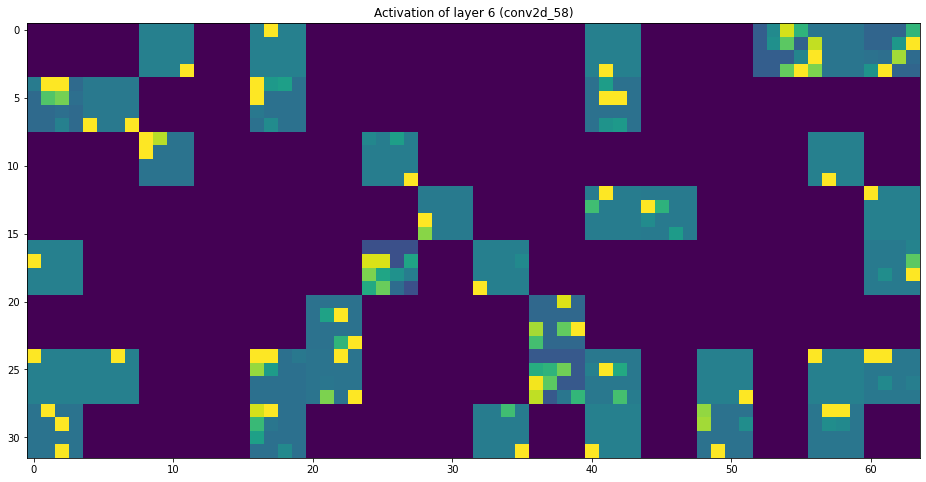

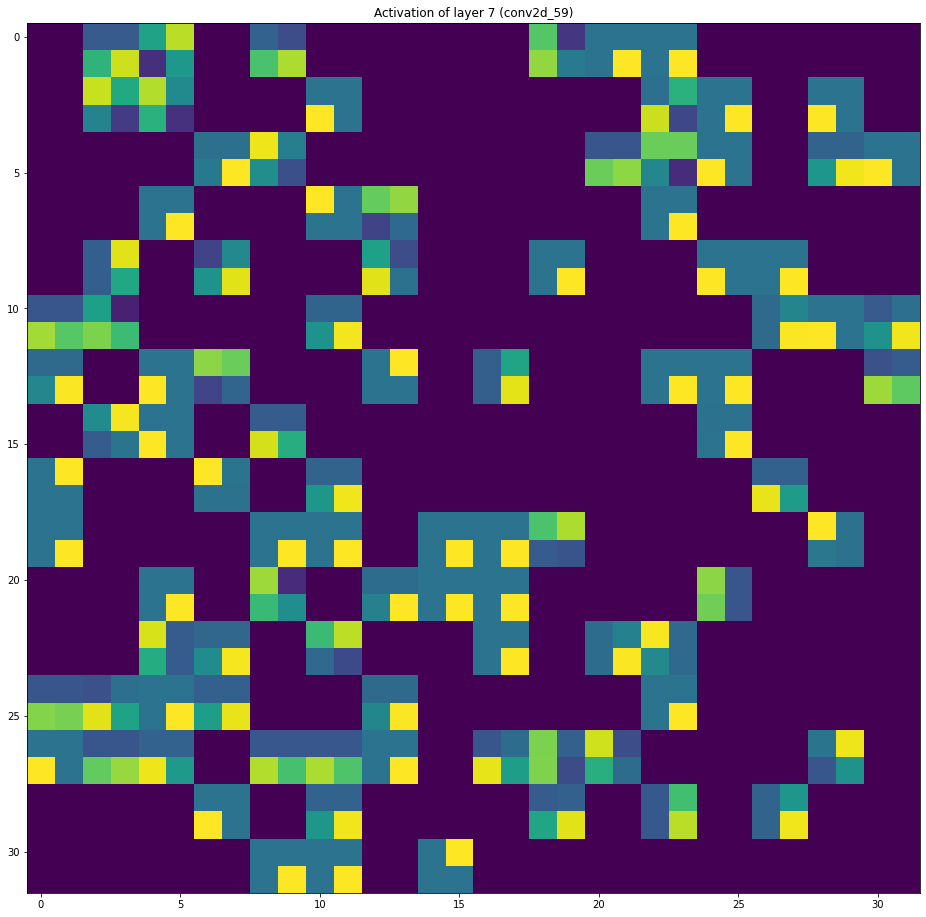

Showing only the most interesting activations
Answer is 494 characters long


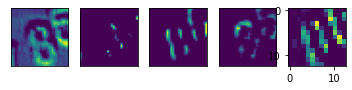

In [0]:
def plot_layer_activations(layer_index, layer_activations, layer_names):
  # Parts of this code originate from the solutions of Lab 6

  images_per_row = 16
  
  for layer_name, layer_activation in zip(layer_names[layer_index:layer_index+1], layer_activations[layer_index:layer_index+1]):
    number_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = number_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                              :, :,
                                              col * images_per_row + row]
            # Post-process the feature
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                          row * size : (row + 1) * size] = channel_image

    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title("Activation of layer {} ({})".format(layer_index+1,layer_name))
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

  plt.show()


def plot_activations():
  # Parts of this code originate from the slides of lecture 6

  img_tensor = X_test_g[0]
  img_tensor = np.expand_dims(img_tensor, axis=0) 
  y_pred = trained_model.predict(img_tensor)

  # Plot the original input image
  f, ax = plt.subplots(1, 1, sharey=True)
  ax.imshow(X_test[0])
  ax.set_xlabel('Input image')
  ax.set_yticks([])

  # Extracts the outputs of the top 7 layers
  layer_outputs = [layer.output for layer in trained_model.layers[:7]]

  # Extract the names of the top 7 layers
  layer_names = [layer.name for layer in trained_model.layers[:7]]

  # Creates a model that will return these outputs, given the model input
  activation_model = models.Model(inputs=trained_model.input, outputs=layer_outputs)

  # Obtain the predictions of the activation model
  activations = activation_model.predict(img_tensor)

  print("Showing all activations")

  # Plot only the convolution layers
  for i, _ in enumerate(activations):
    if 'conv2d' in layer_names[i]:
      plot_layer_activations(i, activations, layer_names)

  print("Showing only the most interesting activations")
  first_layer_activations = activations[0]
  fourth_layer_activations = activations[3]

  # Plot the most interesting activations
  f, (a1, a2, a3, a4, a5) = plt.subplots(1, 5, sharey=False)
  a1.imshow(first_layer_activations[0, :, :, 0], cmap='viridis')
  a2.imshow(first_layer_activations[0, :, :, 17], cmap='viridis')
  a3.imshow(first_layer_activations[0, :, :, 22], cmap='viridis')
  a4.imshow(first_layer_activations[0, :, :, 25], cmap='viridis')
  a5.imshow(fourth_layer_activations[0, :, :, 17], cmap='viridis')
  
  a1.set_xticks([])
  a1.set_yticks([])
  a2.set_xticks([])
  a2.set_yticks([])
  a3.set_xticks([])
  a3.set_yticks([])
  a4.set_xticks([])
  a4.set_yticks([])

plot_activations()

answer_q_3_2 = """The first conv layer focuses more on edge detection. There are filters that detect horizontal and vertical lines (example 3 and 4), but there are also filters 
that focus on small, lighting-specific details (example 2). The second conv layer focuses on more abstract patterns, the most interesting being filter 18 (example 5), where the layout of digit 8 is partially shown.
The next layers focus on very abstract details. It is unclear whether the model at this point focuses on useful patterns"""
print("Answer is {} characters long".format(len(answer_q_3_2)))

### Question 3.3: Visualizing activations (4 points)
* Again, select the first example from the test set, and the trained model_2_2.
* Implement a function `plot_activation_map()` that builds and shows a class activation map for your last convolutional layer that highlights what the model is paying attention to when classifying the example.
* If possible, superimpossible the activation map over the image. If not, plot
them side by side. Implement a function 'plot_3_3' that returns the entire plot.

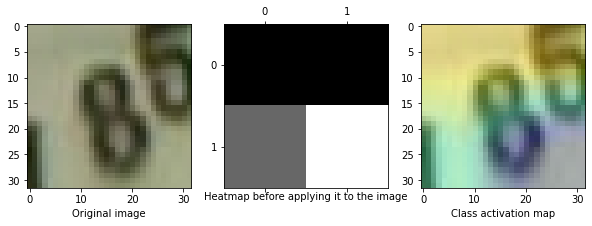

In [0]:
def apply_heatmap(img, heatmap):
  # Parts of this code originate from the solutions of Lab 6

  import cv2

  # We resize the heatmap to have the same size as the original image
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

  # We convert the heatmap to RGB
  heatmap = np.uint8(255 * heatmap)

  # We apply the heatmap to the original image
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

  # 0.001 here is a heatmap intensity factor
  superimposed_img = heatmap * 0.001 + img

  return superimposed_img


def plot_activation_map():
  from tensorflow.keras import backend as K

  img_tensor = X_test_g[0]
  img_tensor = np.expand_dims(img_tensor, axis=0) 

  layer_outputs = [layer.output for layer in trained_model.layers[:7]]

  layer_names = [layer.name for layer in trained_model.layers[:7]]

  last_conv_layer = trained_model.get_layer(layer_names[-1])

  # Compute the gradients for the last conv layer
  with tf.GradientTape() as tape:
    activation_model = models.Model(inputs=trained_model.input, outputs=layer_outputs)
    activation = activation_model.output[:7]
    grads = tape.gradient(activation, last_conv_layer.output)
  
  pooled_grads = K.mean(grads, axis=(0, 1, 2))

  iterate = K.function([trained_model.input], [pooled_grads, last_conv_layer.output[0]])

  pooled_grads_value, conv_layer_output_value = iterate([img_tensor])

  for i in range(256):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  max_heat = np.max(heatmap)
  heatmap /= max_heat

  # Plot the original image, the heatmap and class activation map
  f, (a1, a2, a3) = plt.subplots(1, 3, figsize=(10, 10))
  a1.imshow(X_test[0])
  a1.set_xlabel("Original image")
  a2.matshow(heatmap, cmap='gray')
  a2.set_xlabel("Heatmap before applying it to the image")
  a3.imshow(apply_heatmap(X_test[0], heatmap))
  a3.set_xlabel("Class activation map")

  plt.show()


def plot_3_3():
  plot_activation_map()

plot_3_3()

## Part 4. Transfer learning (10 points)
### Question 4.1 Fast feature extraction with VGG16 (5 points)
- Import the VGG16 model, pretrained on ImageNet. [See here](https://keras.io/applications/). Only import the convolutional part, not the dense layers.
- Implement a function 'build_model_4_1` that adds a dense layer to the convolutional base, and freezes the convolutional base. Consider unfreezing the last few convolutional layers and evaluate whether that works better.
- Train the resulting model on the *original* (colored) training data
- Evaluate the resulting model using 'run_evaluate'. Discuss the observed performance in 'answer_q_4_1'.

In [0]:
def build_model_4_1():
  from tensorflow.keras.applications.vgg16 import VGG16

  conv_base = VGG16(weights='imagenet', 
                  include_top=False,
                  input_shape=(32, 32, 3))

  model = models.Sequential()
  model.add(conv_base)
  model.add(layers.Flatten())
  model.add(layers.Dense(256, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))

  for layer in conv_base.layers:
    if layer.name == 'block5_conv1' or layer.name == 'block4_conv1' or layer.name == 'block3_conv1':
        layer.trainable = True
    else:
        layer.trainable = False
  
  from tensorflow.keras.optimizers import Adam
  model.compile(optimizer=Adam(learning_rate=0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  
  return model

run_evaluation("model_4_1", build_model_4_1, evaluation_split, base_dir, 
               train=False, epochs=20, batch_size=64)
answer_q_4_1 = """Validation accuracy max 61% with all conv layers frozen. With 'block5_conv1' unfreezed, validation accuracy max becomes 82%, but is very overfitting.
With both 'block5_conv1' and  'block4_conv1' unfreezed accuracy becomes 91%, but the model starts overfitting early (validation loss increasing sharply), after epoch 5.
With blocks 5, 4 and 3 unfreezed, max validation accuracy raises to 93.8%. The model still overfits, but less than before.
"""
print("Answer is {} characters long".format(len(answer_q_4_1)))

58892288/58889256 [==============================] - 0s 0us/step
Loading model from file
Answer is 442 characters long


### Question 4.2 Embeddings and pipelines (5 points)
- Generate embeddings of the original images by running them through the trained convolutional part of model_4_1 (without the dense layer) and returning the output. Embed the training and test data and store them to disk using the helper functions below. Implement a function `store_embeddings` that loads model_4_1 and stores all necessary embeddings to file. Make sure to run it once so that the embeddings are stored (and submitted).
- Implement a function 'generate_pipeline' that returns an scikit-learn pipeline. You can use any non-deep learning technique (eg. SVMs, RFs,...), and preprocessing technique. You can do model selection using the validation set. 
- Implement a function 'evaluate_pipeline' that evaluates a given pipeline on a given training and test set. 
- Implement a function 'evaluation_4_2' that evaluates your pipeline on the embedded training and test set (loaded from file) and returns the accuracy. 
- Describe what you did and what you observed. Report the obtained accuracy score. Can you beat your best model thus far?

In [0]:
import pickle
import gzip

def store_embedding(X, name):  
  with gzip.open(os.path.join(base_dir, name+'_embedding.p'), 'wb') as file_pi:
    pickle.dump(X, file_pi)


def load_embedding(name):
  with gzip.open(os.path.join(base_dir, name+'_embedding.p'), 'rb') as file_pi:
    return pickle.load(file_pi)


def store_embeddings():
  """ Stores all necessary embeddings to file
  """

  # Load the model
  trained_model = load_model_from_file(base_dir, "model_4_1")

  # Extract the convolutional part + the flatten layer
  conv_model = models.Sequential(trained_model.layers[:2])

  # Encode the train and test sets
  train_set_encoded = conv_model.predict(X_train_all)
  test_set_encoded = conv_model.predict(X_test)
  
  # Store the encoded sets
  store_embedding(train_set_encoded, "train_set")
  store_embedding(test_set_encoded, "test_set")


def generate_pipeline():
  """ Returns an sklearn pipeline.
  """  
  from sklearn.ensemble import RandomForestClassifier

  clf = RandomForestClassifier()
           
  return sklearn.pipeline.Pipeline(steps=[
                                          ('classifier', clf)
                                          ])


def evaluate_pipeline(pipeline, X_train, y_train, X_test, y_test):
  """ Evaluates the given pipeline, trained on the given embedded training set and 
      evaluated on the supplied embedded test set. Returns the accuracy score.
  """
  from sklearn.metrics import accuracy_score

  pipeline.fit(X_train, y_train)
  predictions = pipeline.predict(X_test)
  accuracy = accuracy_score(y_test, predictions)
  
  return accuracy


def evaluation_4_2(X_train, y_train, X_test, y_test):
  """ Runs 'evaluate_pipeline' with embedded versions of the input data 
  and returns the accuracy.
  """
  X_train_embedded = load_embedding("train_set")
  X_test_embedded = load_embedding("test_set")

  accuracy = evaluate_pipeline(generate_pipeline(), X_train_embedded, y_train_all, X_test_embedded, y_test)
  return accuracy

# store_embeddings()

answer_q_4_2 = """X_train_all was embedded, since the assignment did not specify which training dataset to use.
The pipeline consists only of a RandomForest classifier, since Colab crashed whenever any extra step was added.
An accuracy of 92.4% is achieved, which is close to the result obtained in question 2.1.
The reason could be that the images are now embedded as vectors of length 512 which represent the essential features of each class.
"""

print("Pipeline:",generate_pipeline())
print("Answer is {} characters long".format(len(answer_q_4_2)))

Pipeline: Pipeline(memory=None,
         steps=[('classifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False)
Answer is 392 characters long
